[0.8459860551559968, 0.7980338450934481, 0.7508803208000899, 0.7045175170864015, 0.6589376016663402, 0.6141327692570954, 0.5700953054505149, 0.526817515778244, 0.48429176559701237, 0.44251050726541147, 0.4014661718224417, 0.36115131543256607, 0.32155850773360717, 0.28268041940291166, 0.2445097257623253, 0.20703917684389236, 0.17026156038234616, 0.13416972864477678, 0.09875658062430273, 0.06401507474578225, 0.02993818888953697, -0.0034809846528334933, -0.03624936266640321, -0.06837379747255659, -0.09986106079495273, -0.13071794448846058, -0.1609511141981309, -0.19056722290566777, -0.21957287110710288, -0.24797460999973442, -0.27577893633961825, -0.30299230924047355, -0.3296211385942574, -0.35567177777176373, -0.38115054199106646, -0.40606370611613, -0.43041746758968613, -0.4542180091758924, -0.4774714548460083, -0.5001838842747529, -0.5223613745023468, -0.5440098824734229, -0.5651352742363156, -0.5857436070599442, -0.6058405556151991, -0.6254320779833984, -0.6445238885225191, -0.6631217

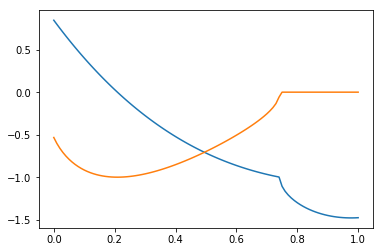

In [6]:
from numpy import cos, arange, linspace, pi, array
from pylab import plot, show
from scipy.integrate import odeint
from numpy.linalg import eig
%matplotlib inline

def f(x, t, delta, eps):
    return [x[1], -(delta+eps*cos(2*t))*x[0]]

deltas = arange(0.0,1.01,0.01)
eps = 0.5
startTime = 0.
endTime = pi
NTimeSteps = 100
time = linspace(startTime, endTime, NTimeSteps + 1)
x0 = array([1.,0])
x1 = array([0,1.])
decrements = []
freqs = []
for delta in deltas:
    out0 = odeint(f, x0, time, args=(delta, eps))
    out1 = odeint(f, x1, time, args=(delta, eps))
    M = array([[out0[NTimeSteps,0], out0[NTimeSteps,1]], [out1[NTimeSteps,0], out1[NTimeSteps,1]]])
    multipl, v = eig(M)
    decrements.append(multipl[0].real)
    freqs.append(multipl[1].imag)
print(decrements)
plot(deltas, decrements)
plot(deltas, freqs);